# Feature Engineering

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler , LabelEncoder

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Price,Units_Sold,Revenue,Shipping_Distance,Customer_Rating,Rating_Category
0,43.708611,21,917.880825,19,3.683744,Good
1,95.564288,13,1242.335738,18,4.265244,Better
2,75.879455,37,2807.539826,1,4.864056,Excellent
3,63.879264,24,1533.102326,78,3.205019,Bad
4,24.041678,17,408.708520,47,4.874457,Excellent


In [3]:
new_data = data.copy()

# Transformation and Standarization

In [4]:
# Normalize the "Customer_Rating" feature
rating_scaler = MinMaxScaler()
new_data["Customer_Rating_Normalized"] = rating_scaler.fit_transform(data[["Customer_Rating"]])

# Standardize the other four features
feature_scaler = StandardScaler()
new_data[["Price", "Units_Sold", "Revenue", "Shipping_Distance"]] = feature_scaler.fit_transform(data[["Price", "Units_Sold", "Revenue", "Shipping_Distance"]])

# Display a portion of the transformed dataset
new_data.head()


,Price,Units_Sold,Revenue,Shipping_Distance,Customer_Rating,Rating_Category,Customer_Rating_Normalized
0,-0.415636,-0.434342,-0.519110,-1.085383,3.683744,Good,0.338805
1,1.515310,-1.050866,-0.204720,-1.119523,4.265244,Better,0.631170
2,0.782307,0.798708,1.311929,-1.699906,4.864056,Excellent,0.932240
3,0.335457,-0.203145,0.077027,0.928885,3.205019,Bad,0.098112
4,-1.147973,-0.742604,-1.012487,-0.129459,4.874457,Excellent,0.937469


# Label Encoding

In [5]:
label_encoder = LabelEncoder()

In [6]:
# Encode the "Rating_Category" column into numerical labels

new_data["Rating_Category_Encoded"] = label_encoder.fit_transform(data["Rating_Category"])


In [7]:
new_data.head()

,Price,Units_Sold,Revenue,Shipping_Distance,Customer_Rating,Rating_Category,Customer_Rating_Normalized,Rating_Category_Encoded
0,-0.415636,-0.434342,-0.519110,-1.085383,3.683744,Good,0.338805,3
1,1.515310,-1.050866,-0.204720,-1.119523,4.265244,Better,0.631170,1
2,0.782307,0.798708,1.311929,-1.699906,4.864056,Excellent,0.932240,2
3,0.335457,-0.203145,0.077027,0.928885,3.205019,Bad,0.098112,0
4,-1.147973,-0.742604,-1.012487,-0.129459,4.874457,Excellent,0.937469,2


In [12]:
new = data.copy()

In [13]:
new

,Price,Units_Sold,Revenue,Shipping_Distance,Customer_Rating,Rating_Category
0,43.708611,21,917.880825,19,3.683744,Good
1,95.564288,13,1242.335738,18,4.265244,Better
2,75.879455,37,2807.539826,1,4.864056,Excellent
3,63.879264,24,1533.102326,78,3.205019,Bad
4,24.041678,17,408.708520,47,4.874457,Excellent
...,...,...,...,...,...,...
495,41.801701,49,2048.283326,30,3.161839,Bad
496,62.529050,33,2063.458652,71,3.805960,Good
497,16.996117,34,577.867989,74,3.347049,Bad
498,97.695533,20,1953.910654,96,4.389902,Better


#  Correlation (Filter Method):

In [14]:
# Calculate the correlation matrix
correlation_matrix = new.corr()

# Get the absolute correlation values with respect to the target ("Customer_Rating")
correlation_with_target = correlation_matrix["Customer_Rating"].abs().sort_values(ascending=False)

# Select features with correlation greater than a threshold (e.g., 0.2)
selected_features_correlation = correlation_with_target[correlation_with_target > 0.2].index.tolist()
print("Selected features based on correlation:\n", selected_features_correlation)



Selected features based on correlation:
 ['Customer_Rating']


C:\Users\nauman.tasawar\AppData\Local\Temp\ipykernel_20696\3474205673.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new.corr()


#  Mutual Information (Filter Method):

In [15]:
from sklearn.feature_selection import mutual_info_regression

# Extract features and target
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Customer_Rating"]

# Calculate mutual information scores
mi_scores = mutual_info_regression(X, y)

# Select features with mutual information scores greater than a threshold (e.g., 0.1)
selected_features_mi = X.columns[mi_scores > 0.1].tolist()
print("Selected features based on mutual information:\n", selected_features_mi)


Selected features based on mutual information:
 []


#  Recursive Feature Elimination (Wrapper Method):

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Extract features and target
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Customer_Rating"]

# Initialize the model for RFE
model = LinearRegression()

# Select the top 2 features using RFE
num_features_to_select = 2
rfe = RFE(model, n_features_to_select=num_features_to_select)
selected_features_rfe = rfe.fit_transform(X, y)

# Get the names of the selected features
selected_feature_names_rfe = X.columns[rfe.support_].tolist()
print("Selected features based on Recursive Feature Elimination (RFE):\n", selected_feature_names_rfe)


Selected features based on Recursive Feature Elimination (RFE):
 ['Price', 'Units_Sold']


# Feature Importance (Embedded Method - Using Random Forest):

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Extract features and target
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Customer_Rating"]

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor()

# Fit the model
model_rf.fit(X, y)

# Get the feature importances
importances = model_rf.feature_importances_

# Select features with importance scores greater than a threshold (e.g., 0.05)
selected_features_importance = X.columns[importances > 0.05].tolist()
print("Selected features based on Feature Importance (Random Forest):\n", selected_features_importance)


Selected features based on Feature Importance (Random Forest):
 ['Price', 'Units_Sold', 'Revenue', 'Shipping_Distance']


# Dimensionality Reduction

# PCA (Principal Component Analysis):

In [21]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Separate features and target variable
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Rating_Category"]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with n_components=2 to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with the reduced dimensions and target variable
pca_data = pd.DataFrame(data=X_pca, columns=["PCA Component 1", "PCA Component 2"])
pca_data["Rating_Category"] = y.values

pca_data.head()


,PCA Component 1,PCA Component 2,Rating_Category
0,-0.708735,0.660037,Good
1,0.151425,2.127802,Better
2,1.840859,0.902943,Excellent
3,0.047484,-0.224606,Bad
4,-1.642798,-0.104434,Excellent


# LDA (Linear Discriminant Analysis):

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming the 'data' DataFrame from the previous examples is available

# Separate features and target variable
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Rating_Category"]

# Apply LDA with n_components=2 to reduce to 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a new DataFrame with the reduced dimensions and target variable
lda_data = pd.DataFrame(data=X_lda, columns=["LDA Component 1", "LDA Component 2"])
lda_data["Rating_Category"] = y.values

print(lda_data.head())


   LDA Component 1  LDA Component 2 Rating_Category
0         0.223227         0.399979            Good
1        -0.020685        -2.110369          Better
2        -0.364528        -0.205395       Excellent
3         0.330358        -0.373567             Bad
4         0.882045         1.225001       Excellent


# ICA (Independent Component Analysis):

In [20]:
from sklearn.decomposition import FastICA

# Assuming the 'data' DataFrame from the previous examples is available

# Separate features and target variable
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Rating_Category"]

# Apply ICA with n_components=2 to reduce to 2 dimensions
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)

# Create a new DataFrame with the reduced dimensions and target variable
ica_data = pd.DataFrame(data=X_ica, columns=["ICA Component 1", "ICA Component 2"])
ica_data["Rating_Category"] = y.values

print(ica_data.head())


   ICA Component 1  ICA Component 2 Rating_Category
0        -0.047510         0.026870            Good
1        -0.054294         0.013252          Better
2        -0.077087        -0.053017       Excellent
3         0.040375        -0.006507             Bad
4        -0.003300         0.045668       Excellent


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


# t-SNE to visualize it in 2D and 3D

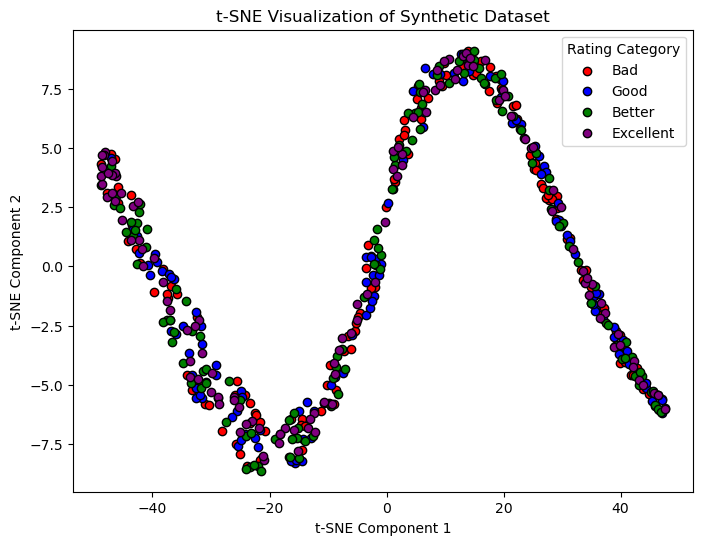

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE



# Separate features and target variable
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Rating_Category"]

# Apply t-SNE to reduce dimensionality from 5D to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame to store the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_df['Rating_Category'] = y

# Plot the data points in 2D using t-SNE
plt.figure(figsize=(8, 6))
colors = {'Bad': 'red', 'Good': 'blue', 'Better': 'green', 'Excellent': 'purple'}
for rating, color in colors.items():
    subset = tsne_df[tsne_df['Rating_Category'] == rating]
    plt.scatter(subset['t-SNE Component 1'], subset['t-SNE Component 2'], color=color, label=rating, edgecolor='k')

plt.legend(title='Rating Category')
plt.title('t-SNE Visualization of Synthetic Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


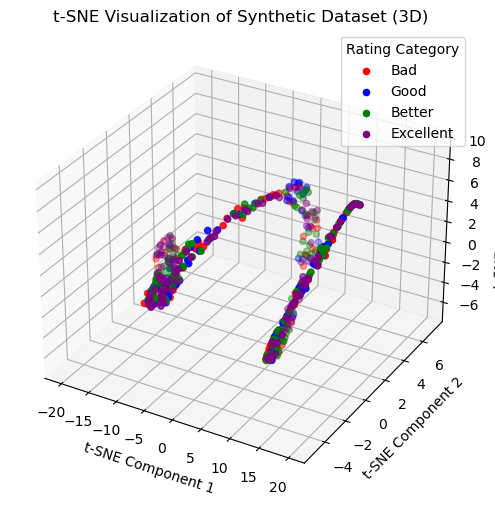

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting module
from sklearn.manifold import TSNE



# Separate features and target variable
X = data.drop(columns=["Customer_Rating", "Rating_Category"])
y = data["Rating_Category"]

# Apply t-SNE to reduce dimensionality from 5D to 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame to store the t-SNE results
tsne_df = pd.DataFrame(data=X_tsne, columns=['t-SNE Component 1', 't-SNE Component 2', 't-SNE Component 3'])
tsne_df['Rating_Category'] = y

# Plot the data points in 3D using t-SNE
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = {'Bad': 'red', 'Good': 'blue', 'Better': 'green', 'Excellent': 'purple'}
for rating, color in colors.items():
    subset = tsne_df[tsne_df['Rating_Category'] == rating]
    ax.scatter(subset['t-SNE Component 1'], subset['t-SNE Component 2'], subset['t-SNE Component 3'], c=color, label=rating)

ax.set_title('t-SNE Visualization of Synthetic Dataset (3D)')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.legend(title='Rating Category')
plt.show()
